
<b><em><h5>Data Analysis Hackathon: Optimizing Bank Marketing Strategies for Customer Acquisition.</h5></b>

Data sets location & description : https://archive.ics.uci.edu/dataset/222/bank+marketing

There are four datasets: 
1) bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]
2) bank-additional.csv with 10% of the examples (4119), randomly selected from 1), and 20 inputs.
3) bank-full.csv with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs). 
4) bank.csv with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs). 

The classification goal was to predict if the client would subscribe (yes/no) to a term deposit (variable y).

<b>--> For a more comprehensive analysis, "bank-additional-full.csv" was chosen for the task at hand, as it contains the full data set with all 20 points, making it the most detailed and versatile option, specially as it also aligns with data analized in [Moro et al., 2014], making its data more relevant.<b>

<em>

In [752]:
# importing the necessary libraries for data analysis

import numpy as np # to work with arrays
import pandas as pd # to work with tabular data
import matplotlib.pyplot as plt # to visualize data using charts and graphs

# importing the dataset to store in a dataframe and starting preliminary analysis

df = pd.read_csv('bank-additional-full.csv', sep=';')

# checking for null values

df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

<em>--> No null values found.<em>

In [753]:
# checking for duplicate values

df.duplicated().sum()

12

<em>--> Found duplicate values in 12 rows.<em>

In [754]:
# checking which rows are duplicates from the result obtained above

duplicate_rows = df[df.duplicated()]
print(duplicate_rows)


       age          job   marital            education  default housing loan  \
1266    39  blue-collar   married             basic.6y       no      no   no   
12261   36      retired   married              unknown       no      no   no   
14234   27   technician    single  professional.course       no      no   no   
16956   47   technician  divorced          high.school       no     yes   no   
18465   32   technician    single  professional.course       no     yes   no   
20216   55     services   married          high.school  unknown      no   no   
20534   41   technician   married  professional.course       no     yes   no   
25217   39       admin.   married    university.degree       no      no   no   
28477   24     services    single          high.school       no     yes   no   
32516   35       admin.   married    university.degree       no     yes   no   
36951   45       admin.   married    university.degree       no      no   no   
38281   71      retired    single    uni

<em>--> After a quick analysis, found that there are no whole row duplicates, but just some duplicate values concerning job description, marital status, education, etc...so no need to clean duplicates.<em>

In [755]:
# displaying column names 

df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

<em>--> Some column names are not very explicit and thus need to be modified for better understandability.<em>

In [756]:
# # Renaming some column names for better clarity and readability and storing the result in a different dataframe named df2

df2 = df.rename(columns={'age': 'age',
                        'job': 'job',
                        'marital': 'marital_status',
                        'education': 'education',
                        'default': 'credit_default',
                        'housing': 'housing_loan',
                        'loan': 'personal_loan',
                        'contact': 'contact_type',
                        'month': 'contact_month',
                        'day_of_week': 'contact_day_of_week',
                        'duration': 'call_duration',
                        'campaign': 'campaign_contacts',
                        'pdays': 'days_since_last_contact',
                        'previous': 'previous_contacts',
                        'poutcome': 'previous_outcome',
                        'emp.var.rate': 'employment_variation_rate',
                        'cons.price.idx': 'consumer_price_index',
                        'cons.conf.idx': 'consumer_confidence_index',
                        'euribor3m': 'euribor_3_months',
                        'nr.employed': 'number_employed',
                        'y': 'target'})

# verifying that column names have been modified accordingly

df2.columns

Index(['age', 'job', 'marital_status', 'education', 'credit_default',
       'housing_loan', 'personal_loan', 'contact_type', 'contact_month',
       'contact_day_of_week', 'call_duration', 'campaign_contacts',
       'days_since_last_contact', 'previous_contacts', 'previous_outcome',
       'employment_variation_rate', 'consumer_price_index',
       'consumer_confidence_index', 'euribor_3_months', 'number_employed',
       'target'],
      dtype='object')

In [757]:
# checking information about the data set, like number of columns & rows, data types & memory usage, etc...
#  
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        41188 non-null  int64  
 1   job                        41188 non-null  object 
 2   marital_status             41188 non-null  object 
 3   education                  41188 non-null  object 
 4   credit_default             41188 non-null  object 
 5   housing_loan               41188 non-null  object 
 6   personal_loan              41188 non-null  object 
 7   contact_type               41188 non-null  object 
 8   contact_month              41188 non-null  object 
 9   contact_day_of_week        41188 non-null  object 
 10  call_duration              41188 non-null  int64  
 11  campaign_contacts          41188 non-null  int64  
 12  days_since_last_contact    41188 non-null  int64  
 13  previous_contacts          41188 non-null  int

<em>--> We can deduct from the above result that there are 41188 entries and 21 columns, out of which 5 are floats, 5 are integers and 11 are object strings.<em> 


In [758]:
# calculating some statistical data like percentile, mean, std, minimum & maximum values, etc...

df2.describe()

,age,call_duration,campaign_contacts,days_since_last_contact,previous_contacts,employment_variation_rate,consumer_price_index,consumer_confidence_index,euribor_3_months,number_employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


<em>--> A quick overview of the above results and we can see that the mean age of people contacted is 40 years old, with minimum being 17, and maximum being 98!<em>

In [759]:
# just for fun, let's see what the target was in their cases...('yes' if they accepted to agree to a term deposit and 'no' if they refused)

df2.set_index("age",
             inplace=True)

result = df2.loc[[17,98], ["job", "target"]]

result

,job,target
age,,
17,student,no
17,student,no
17,student,no
17,student,yes
17,student,yes
98,retired,yes
98,retired,yes


<em>--> 2 students out of the 5 who were 17 years old and both 98 year old senior citizens agreed to subscribe to a term deposit!<em>

In [760]:
# displaying the first & last 5 rows of the data set to get a quick overview of the data structure and contents

df2.head()

,job,marital_status,education,credit_default,housing_loan,personal_loan,contact_type,contact_month,contact_day_of_week,call_duration,campaign_contacts,days_since_last_contact,previous_contacts,previous_outcome,employment_variation_rate,consumer_price_index,consumer_confidence_index,euribor_3_months,number_employed,target
age,,,,,,,,,,,,,,,,,,,,
56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [761]:
df2.tail()

,job,marital_status,education,credit_default,housing_loan,personal_loan,contact_type,contact_month,contact_day_of_week,call_duration,campaign_contacts,days_since_last_contact,previous_contacts,previous_outcome,employment_variation_rate,consumer_price_index,consumer_confidence_index,euribor_3_months,number_employed,target
age,,,,,,,,,,,,,,,,,,,,
73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
74,retired,married,professional.course,no,yes,no,cellular,nov,fri,239,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


<em>--> So these were preliminary analysis done after importing the data set into a dataframe and some light cleaning done on the column names, fortunately no null values found nor duplicates.<em>

<em><b>--> Now we move into Customer Segmentation.<b><em>

In [762]:
# adding all positive targets into a new dataframe called positive_df

positive_df = df2[df2['target'] == 'yes']

positive_df

,job,marital_status,education,credit_default,housing_loan,personal_loan,contact_type,contact_month,contact_day_of_week,call_duration,campaign_contacts,days_since_last_contact,previous_contacts,previous_outcome,employment_variation_rate,consumer_price_index,consumer_confidence_index,euribor_3_months,number_employed,target
age,,,,,,,,,,,,,,,,,,,,
41,blue-collar,divorced,basic.4y,unknown,yes,no,telephone,may,mon,1575,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
49,entrepreneur,married,university.degree,unknown,yes,no,telephone,may,mon,1042,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
49,technician,married,basic.9y,no,no,no,telephone,may,mon,1467,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
41,technician,married,professional.course,unknown,yes,no,telephone,may,mon,579,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
45,blue-collar,married,basic.9y,unknown,yes,no,telephone,may,mon,461,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,retired,married,university.degree,no,yes,no,cellular,nov,thu,208,1,1,6,success,-1.1,94.767,-50.8,1.031,4963.6,yes
62,retired,married,university.degree,no,no,no,cellular,nov,thu,483,2,6,3,success,-1.1,94.767,-50.8,1.031,4963.6,yes
37,admin.,married,university.degree,no,yes,no,cellular,nov,fri,281,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [763]:
# calculating marketing campaign success rate

number_of_people_contacted = len(df2.index)
positive_target_count = len(positive_df.index)
success_rate = (positive_target_count/number_of_people_contacted)*100

print(f'Number of people contacted: {number_of_people_contacted}')
print(f'Number of positive outcome: {positive_target_count}')
print(f"Success rate: {round(success_rate, 2)} %")

Number of people contacted: 41188
Number of positive outcome: 4640
Success rate: 11.27 %


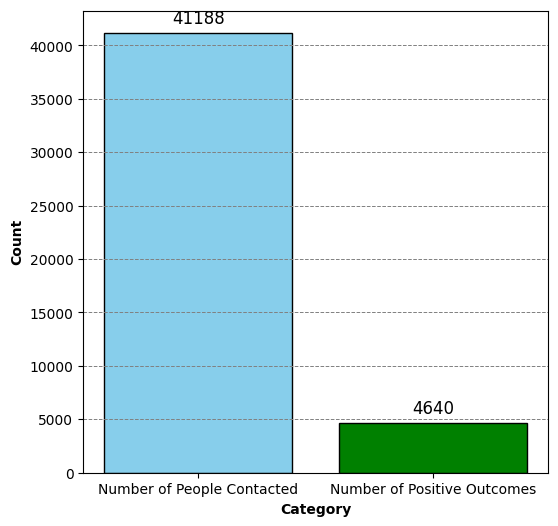

In [764]:
# displaying the number of positive targets compared to the total number of entries in a bar chart

categories = ['Number of People Contacted', 'Number of Positive Outcomes']
values = [number_of_people_contacted, positive_target_count]

plt.figure(figsize=(6, 6))
plt.bar(categories, values, color=['skyblue', 'green'], edgecolor='black')
plt.grid(axis='y', color='grey', linestyle='--', linewidth=0.7)

# plt.title('Number of People Contacted vs. Number of Positive Outcomes')
plt.xlabel('Category', fontweight='bold')
plt.ylabel('Count', fontweight='bold')

# Add value labels on top of bars
for i, value in enumerate(values):
    plt.text(i, value + 500, str(value), ha='center', va='bottom', fontsize=12)

plt.show()

<em>--> Out of the 41188 people contacted, only 4640 agreed to a term deposit, which is a low success rate of 11.27 %. <br><br>
--> This can immediately be explained by several factors:<br> (1) the campaign was conducted from may 2008 to november 2010, right in the middle of the global financial crisis which started in 2007, with the collapse of the housing bubble in the US and the ensuing subprime mortgage crisis. The peak of the crisis occured in late 2008 and early 2009, ensuing severe contractions and financial market turmoil, with a very slow recovery as from 2009.<br>
(2) with a global recession, there are big cash flow concerns, as a lot of people were lead off from their work. <br>
(3) With uncertainty in the markets, people may have opted for safer and more lucrative investments, like real estate, which was at a record low because of the crisis.<em><br><br>
We will later dwelve deeper into further analysis to understand if there were other factors involved in such low conversion rates.

<p style = "text-align: center ;">---------------------- || ----------------------</p>
<em><b>--> The following section focuses on performing detailed segment analysis using demographic factors such as age, education level, occupation, marital status, etc... <b><em>

In [765]:
# grouping the whole 'age' range in categories like 10-20, 20-30, 30-40, etc...

bins = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['10-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']

df = df.reset_index()

# Cut the 'age' column into bins and assign the labels
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Group by 'age_group' and count the occurrences in each group
age_group_counts = df['age_group'].value_counts().sort_index()

print(age_group_counts)

age_group
10-20        75
21-30      5594
31-40     16938
41-50     10526
51-60      6862
61-70       724
71-80       319
81-90       140
91-100       10
Name: count, dtype: int64


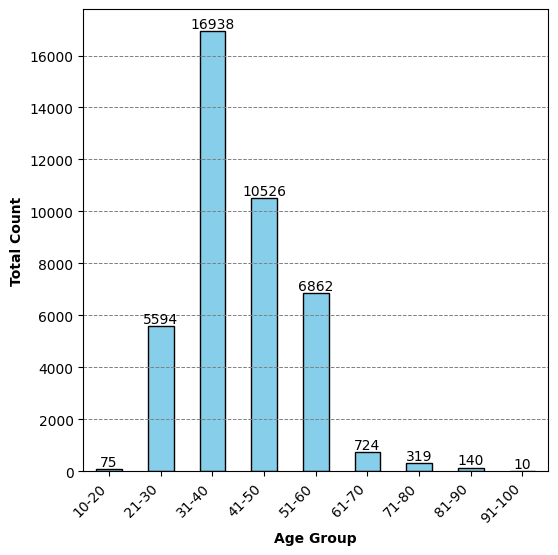

In [766]:
# using the above values to plot the bar chart

plt.figure(figsize=(6, 6))
bars = age_group_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.grid(axis='y', color='grey', linestyle='--', linewidth=0.7)

plt.xlabel('Age Group', fontweight='bold')
plt.ylabel('Total Count', fontweight='bold')
plt.xticks(rotation=45, ha='right')


for bar in bars.containers[0]:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height,
             f'{int(height)}', ha='center', va='bottom')

plt.show()

<em>--> We can clearly see that the majority of people contacted were in the 30-40 age group with a total of 16,938, followed by the 40-50 age group with a total of 10526. The lowest age group of 10-20 had 75 people in it, whereas the highest age group of 90-100 had 10 people in it.<em>

In [767]:
# calculating the value counts for each job category

job_count = df2['job'].value_counts()
print(job_count)

job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64


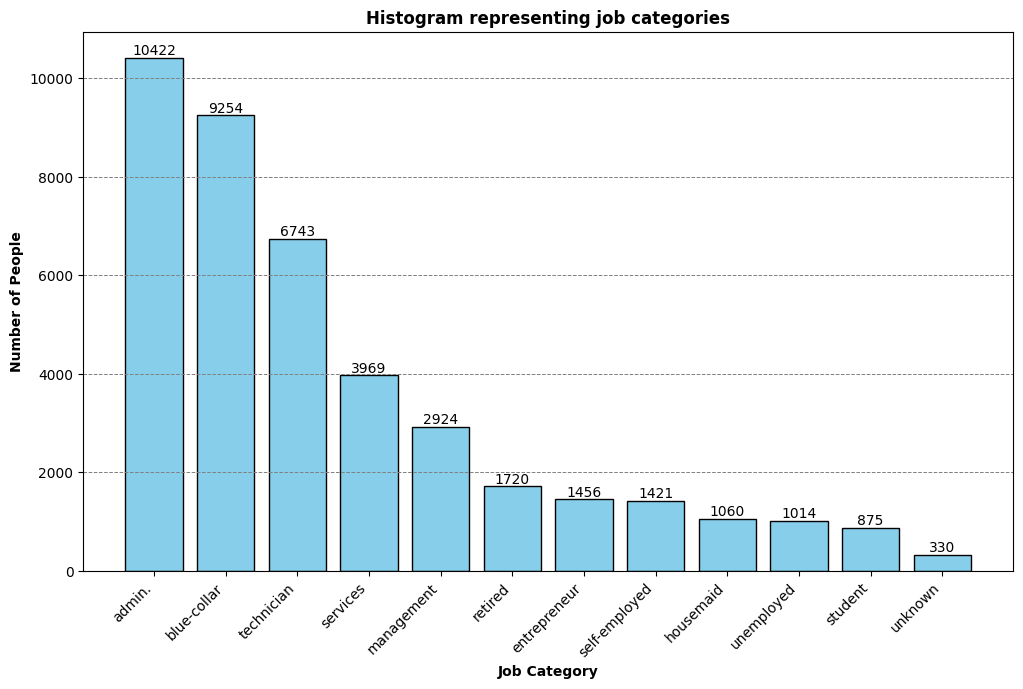

In [768]:
# ploting the above data in a histogram

job_categories = [
    'admin.', 'blue-collar', 'technician', 'services', 'management',
    'retired', 'entrepreneur', 'self-employed', 'housemaid', 'unemployed',
    'student', 'unknown'
]

counts = [
    10422, 9254, 6743, 3969, 2924,
    1720, 1456, 1421, 1060, 1014,
    875, 330
]

plt.figure(figsize=(12, 7))
bars = plt.bar(job_categories, counts, color='skyblue', edgecolor='black')
plt.grid(axis='y', color='grey', linestyle='--', linewidth=0.7)

plt.title('Histogram representing job categories', fontweight='bold')
plt.xlabel('Job Category', fontweight='bold')
plt.ylabel('Number of People', fontweight='bold')

plt.xticks(rotation=45, ha='right')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval,
             int(yval), ha='center', va='bottom')

plt.show()

<em>--> The highest count is found in the administrative department with a total of 10422, followed by blue-collar jobs with 9254 entries. The chart also portrays 1720 retirees and 875 students.<em>

In [769]:
# calculating the value counts for the education category

education_count = df2['education'].value_counts()
print(education_count)

education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: count, dtype: int64


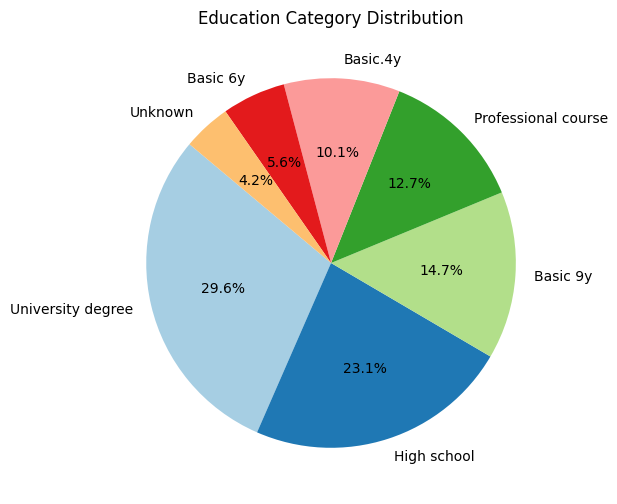

In [770]:
# ploting a pie chart using the above data

labels = [
    'University degree', 'High school', 'Basic 9y',
    'Professional course', 'Basic.4y', 'Basic 6y',
    'Unknown'
]

sizes = [
    12168, 9515, 6045,
    5243, 4176, 2292,
    1731
]

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        startangle=140, colors=plt.cm.Paired.colors)

plt.title('Education Category Distribution')

plt.show()

<em>--> Out of the 41188 entries, 12168 had university degrees, which represents a percentage of 29.6%, 9515 had high school diplomas, meaning a percentage of 23.1%, with 6045 with basic 9year education, representing a 14.7% and 18 illetarate, which is not illustrated in the chart due to its insignificant size.  <em>

In [771]:
# calculating the value counts for the marital status category

marital_status_count = df2['marital_status'].value_counts()
print(marital_status_count)

marital_status
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64


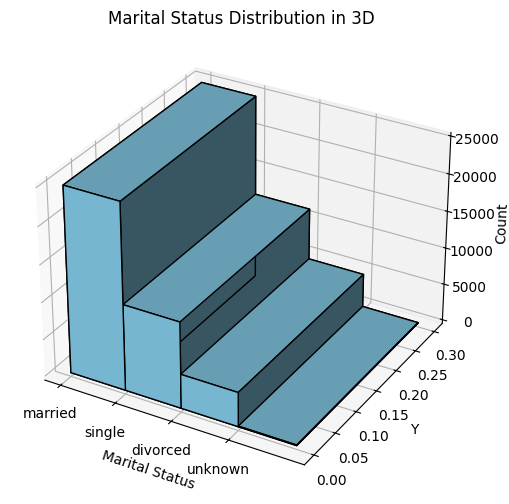

In [772]:
# ploting the above data in a 3d bar chart

marital_status = ['married', 'single', 'divorced', 'unknown']
counts = [24928, 11568, 4612, 80]

# Creating the figure and 3D axes
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Generate x, y, z data
x = np.arange(len(marital_status))  # x-coordinates for the bars
# y-coordinates (all zeros for this example)
y = np.zeros(len(marital_status))
z = np.zeros(len(marital_status))   # z-coordinates (starting at zero)

# Bar width and depth
dx = np.ones(len(marital_status))  # Width of the bars
dy = np.full(len(marital_status), 0.3)  # Depth of the bars
# Height of the bars (counts of each category)
dz = counts

# Plotting the 3D bars
ax.bar3d(x, y, z, dx, dy, dz, color='skyblue', edgecolor='black')

# Customizing the axes labels
ax.set_xlabel('Marital Status')
# Placeholder for the y-axis, which isn't used in this context
ax.set_ylabel('Y')
ax.set_zlabel('Count')
ax.set_xticks(x)
ax.set_xticklabels(marital_status)

ax.set_title('Marital Status Distribution in 3D')

plt.show()

<em>--> The data set shows 24928 people were married, 11568 were single, 4612 were divorced and 80 didn't know their marital status.<em>

In [773]:
# calculating number of people owning a house, based on whether they have a housing loan or not

housing_loan_count = df2['housing_loan'].value_counts()
print(housing_loan_count)

housing_loan
yes        21576
no         18622
unknown      990
Name: count, dtype: int64


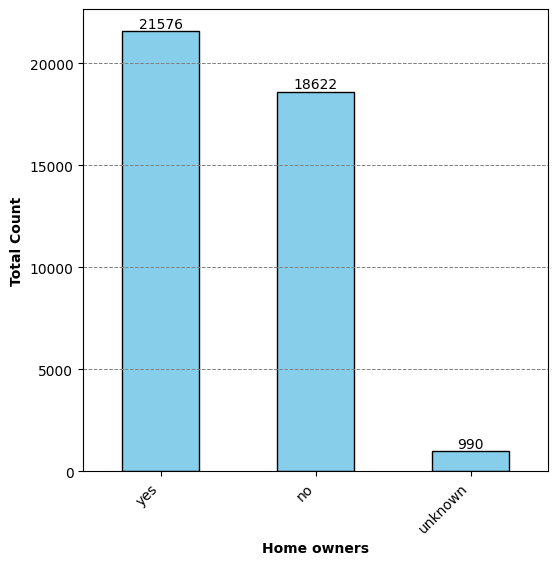

In [774]:
# ploting the above data in a bar chart

plt.figure(figsize=(6, 6))
bars = housing_loan_count.plot(kind='bar', color='skyblue', edgecolor='black')

plt.grid(axis='y', color='grey', linestyle='--', linewidth=0.7)

plt.xlabel('Home owners', fontweight = 'bold')
plt.ylabel('Total Count', fontweight='bold')
plt.xticks(rotation=45, ha='right')

for bar in bars.containers[0]:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height,
             f'{int(height)}', ha='center', va='bottom')

plt.show()

<em>--> Based on the figures from the housing_loan column in the data set, we can deduct that 21576 people are house owners, while 18622 rent their homes and 990 do not know their status.<br><br>--> This marks the end of the first part of the segmentation analysis. Demographic factors such as age, occupation, marital status, education and whether they are home owners or not have been used. Unfortunately gender is not available from the data set nor income levels.<em>
<p style = "text-align: center ;">---------------------- || ----------------------</p>
<em><b>--> Now we analyse customer behavior based on purchase history and engagement levels.<b><em>


In [775]:
# grouping the positive targets from 'age' category 

bins = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['10-20', '21-30', '31-40', '41-50',
          '51-60', '61-70', '71-80', '81-90', '91-100']

df = df.reset_index()
positive_df_reset = positive_df.reset_index()

df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)
positive_df_reset['age_group'] = pd.cut(
    positive_df_reset['age'], bins=bins, labels=labels, right=False)

age_group_counts = df['age_group'].value_counts().sort_index()
positive_age_group_counts = positive_df_reset['age_group'].value_counts(
).sort_index()

print(age_group_counts,'\n')
print(positive_age_group_counts)

age_group
10-20        75
21-30      5594
31-40     16938
41-50     10526
51-60      6862
61-70       724
71-80       319
81-90       140
91-100       10
Name: count, dtype: int64 

age_group
10-20       34
21-30      888
31-40     1715
41-50      834
51-60      697
61-70      251
71-80      144
81-90       72
91-100       5
Name: count, dtype: int64


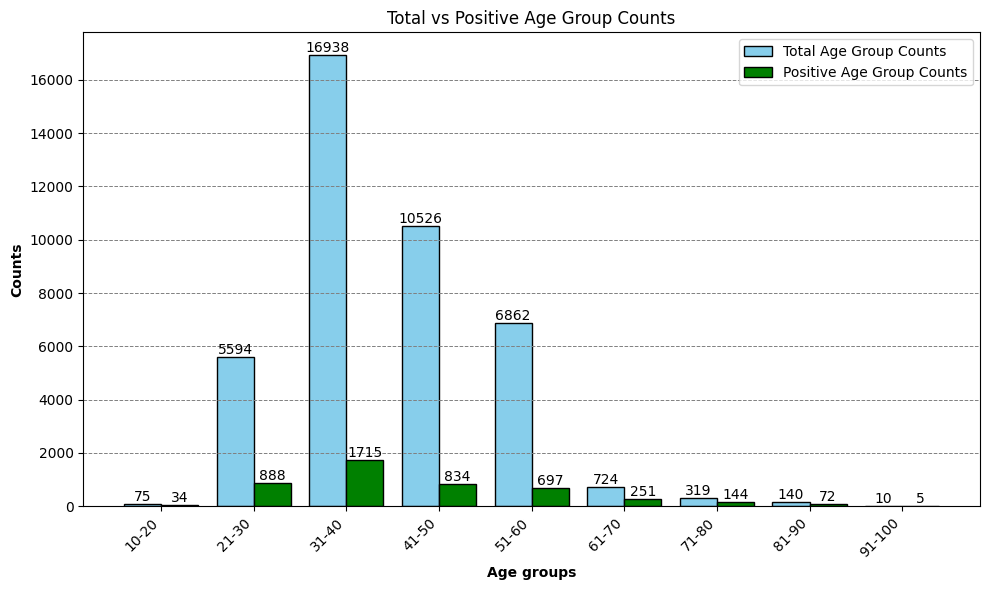

In [776]:
# ploting positive outcomes of age groups against total number of people in age groups 

age_groups = ['10-20', '21-30', '31-40', '41-50',
              '51-60', '61-70', '71-80', '81-90', '91-100']

total_counts = [75, 5594, 16938, 10526, 6862, 724, 319, 140, 10]
positive_counts = [34, 888, 1715, 834, 697, 251, 144, 72, 5]

bar_width = 0.40
plt.figure(figsize=(10, 6))

r1 = np.arange(len(age_groups))
r2 = [x + bar_width for x in r1]

bars1 = plt.bar(r1, total_counts, color='skyblue', width=bar_width,
                edgecolor='black', label='Total Age Group Counts')
bars2 = plt.bar(r2, positive_counts, color='green', width=bar_width,
                edgecolor='black', label='Positive Age Group Counts')
plt.grid(axis='y', color='grey', linestyle='--', linewidth=0.7)

plt.xlabel('Age groups', fontweight='bold')
plt.ylabel('Counts', fontweight='bold')
plt.title('Total vs Positive Age Group Counts')
plt.xticks([r + bar_width/2 for r in range(len(age_groups))],
           age_groups, rotation=45, ha="right")

plt.legend()

for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval,
             int(yval), ha='center', va='bottom')

for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval,
             int(yval), ha='center', va='bottom')

plt.tight_layout()
plt.show()

<em>--> The above chart shows the number of positive outcomes in each age group against the total number of people in each age group. We can now clearly see how many people agreed to a term deposit in each age group category.<em>

In [777]:
# calculating the positive value counts for each job category

job_count = df['job'].value_counts()
print(job_count,'\n')

positive_job_count = positive_df['job'].value_counts()
print(positive_job_count)

job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64 

job
admin.           1352
technician        730
blue-collar       638
retired           434
management        328
services          323
student           275
self-employed     149
unemployed        144
entrepreneur      124
housemaid         106
unknown            37
Name: count, dtype: int64


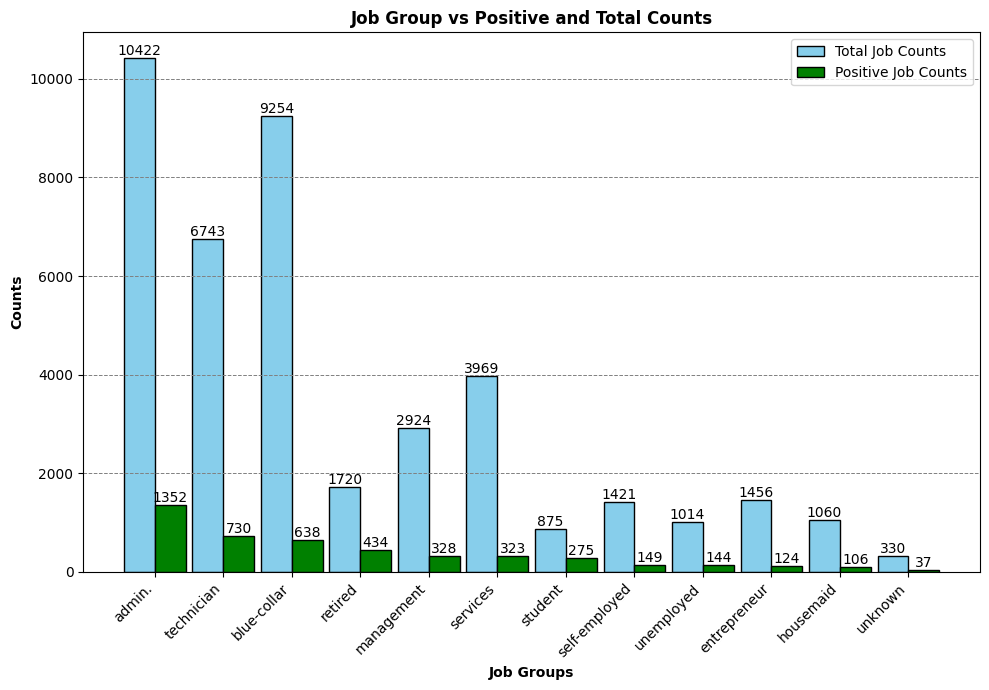

In [778]:
# ploting the positive outcomes in each job category against the total of each job category

job_groups = ['admin.', 'technician', 'blue-collar', 'retired', 'management', 'services',
              'student', 'self-employed', 'unemployed', 'entrepreneur', 'housemaid', 'unknown']

job_total_counts = [10422, 6743, 9254, 1720,
                    2924, 3969, 875, 1421, 1014, 1456, 1060, 330]

job_positive_counts = [1352, 730, 638, 434,
                       328, 323, 275, 149, 144, 124, 106, 37]

# Sort both lists according to the job_groups order
# Aligning the data based on the job groups
job_total_counts_aligned = [10422, 6743, 9254, 1720,
                            2924, 3969, 875, 1421, 1014, 1456, 1060, 330]

bar_width = 0.45

# X-axis positions for the first set of bars
r1 = np.arange(len(job_groups))

# X-axis positions for the second set of bars (offset by bar_width)
r2 = [x + bar_width for x in r1]

plt.figure(figsize=(10, 7))
bars1 = plt.bar(r1, job_total_counts, color='skyblue', width=bar_width,
                edgecolor='black', label='Total Job Counts')
bars2 = plt.bar(r2, job_positive_counts, color='green', width=bar_width,
                edgecolor='black', label='Positive Job Counts')
plt.grid(axis='y', color='grey', linestyle='--', linewidth=0.7)

plt.xlabel('Job Groups', fontweight='bold')
plt.ylabel('Counts', fontweight='bold')
plt.title('Job Group vs Positive and Total Counts', fontweight='bold')
plt.xticks([r + bar_width/2 for r in range(len(job_groups))],
           job_groups, rotation=45, ha="right")

plt.legend()

# Add values on top of each bar
for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval,
             int(yval), ha='center', va='bottom')

for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval,
             int(yval), ha='center', va='bottom')

plt.tight_layout()
plt.show()

<em>--> The above chart easily shows the number of positive outcomes in each job category compared to the total in each job category.<em>

In [779]:
# total education categories figures vs positive outcomes from the total education category count

education_count = df2['education'].value_counts()
print(f'Total education categories count: {education_count},\n')

positive_education_count = positive_df['education'].value_counts()
print(f'Positive outcomes from total education category count: {positive_education_count}')

Total education categories count: education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: count, dtype: int64,

Positive outcomes from total education category count: education
university.degree      1670
high.school            1031
professional.course     595
basic.9y                473
basic.4y                428
unknown                 251
basic.6y                188
illiterate                4
Name: count, dtype: int64


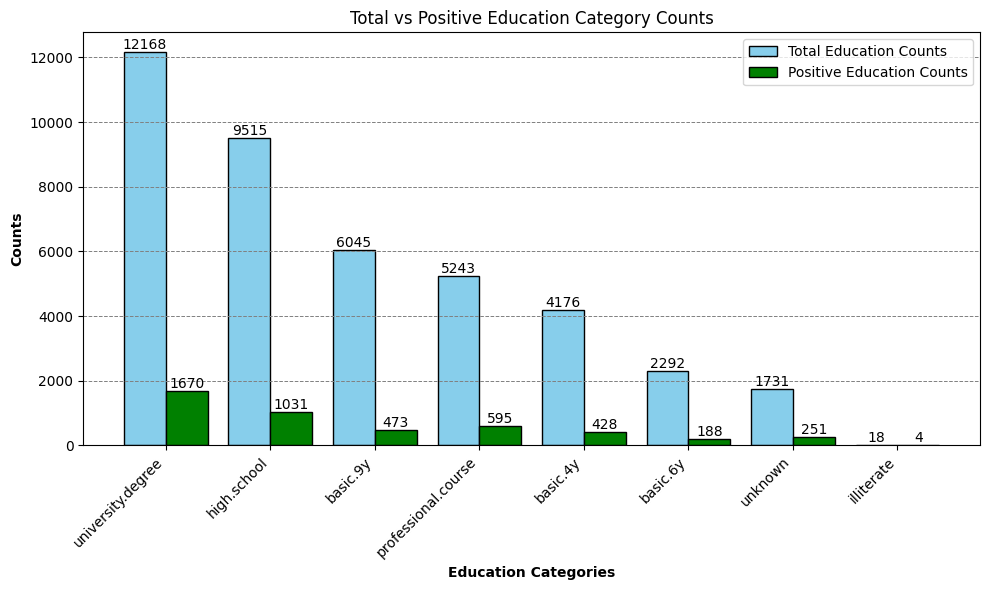

In [780]:
# ploting the positive outcomes of the education categories group against their total

education_categories = [
    'university.degree', 'high.school', 'basic.9y', 'professional.course',
    'basic.4y', 'basic.6y', 'unknown', 'illiterate'
]

total_education_counts = [12168, 9515, 6045, 5243, 4176, 2292, 1731, 18]
positive_education_counts = [1670, 1031, 473, 595, 428, 188, 251, 4]

bar_width = 0.40

r1 = np.arange(len(education_categories))

r2 = [x + bar_width for x in r1]

plt.figure(figsize=(10, 6))
bars1 = plt.bar(r1, total_education_counts, color='skyblue', width=bar_width,
                edgecolor='black', label='Total Education Counts')
bars2 = plt.bar(r2, positive_education_counts, color='green', width=bar_width,
                edgecolor='black', label='Positive Education Counts')
plt.grid(axis='y', color='grey', linestyle='--', linewidth=0.7)

plt.xlabel('Education Categories', fontweight='bold')
plt.ylabel('Counts', fontweight='bold')
plt.title('Total vs Positive Education Category Counts')
plt.xticks([r + bar_width/2 for r in range(len(education_categories))],
           education_categories, rotation=45, ha="right")

plt.legend()

for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval,
             int(yval), ha='center', va='bottom')

for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval,
             int(yval), ha='center', va='bottom')

plt.tight_layout()
plt.show()

<em>--> With the help of the above bar chart, we can clearly how many positive outcomes we have from each job categories against their totals.<em>

In [781]:
# calculating positive outcomes of the marital status column

marital_status_count = df2['marital_status'].value_counts()
print(f'Total of marital status: {marital_status_count},\n')

positive_marital_status_count = positive_df['marital_status'].value_counts()
print(f'Positive outcomes from the marital status groups: {positive_marital_status_count}')

Total of marital status: marital_status
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64,

Positive outcomes from the marital status groups: marital_status
married     2532
single      1620
divorced     476
unknown       12
Name: count, dtype: int64


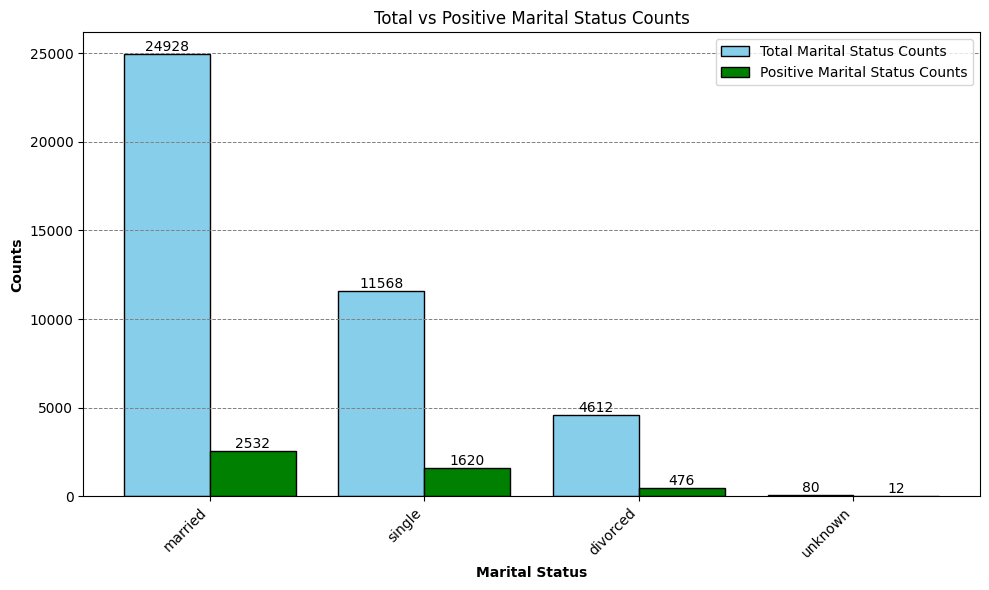

In [782]:
# ploting the positive outcomes of the marital status groups against their total

marital_status = ['married', 'single', 'divorced', 'unknown']

total_counts = [24928, 11568, 4612, 80]
positive_counts = [2532, 1620, 476, 12]

# Set width of the bars
bar_width = 0.40

# X-axis positions for the first set of bars
r1 = np.arange(len(marital_status))

# X-axis positions for the second set of bars (offset by bar_width)
r2 = [x + bar_width for x in r1]

# Create the bar chart
plt.figure(figsize=(10, 6))
bars1 = plt.bar(r1, total_counts, color='skyblue', width=bar_width,
                edgecolor='black', label='Total Marital Status Counts')
bars2 = plt.bar(r2, positive_counts, color='green', width=bar_width,
                edgecolor='black', label='Positive Marital Status Counts')
plt.grid(axis='y', color='grey', linestyle='--', linewidth=0.7)

# Add labels and title
plt.xlabel('Marital Status', fontweight='bold')
plt.ylabel('Counts', fontweight='bold')
plt.title('Total vs Positive Marital Status Counts')
plt.xticks([r + bar_width/2 for r in range(len(marital_status))],
           marital_status, rotation=45, ha="right")

# Add legend
plt.legend()

# Add values on top of each bar
for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval,
             int(yval), ha='center', va='bottom')

for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval,
             int(yval), ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()

<em>--> Out of the 24928 married people contacted, only 2532 agreed to a term deposit, 1620 single out of 11568 agreed and 476 out of 4612 divorced people converted to a term deposit. Out of the 80 who did not know their marital status, 12 were positive outcomes.<em>

In [783]:
# calculating the positive outcomes from the home owners categories

housing_loan_count = df2['housing_loan'].value_counts()
print(f'Total number of home owners category: {housing_loan_count},\n')

positive_housing_loan_count = positive_df['housing_loan'].value_counts()
print(f'Positive outcomes for home owners category: {positive_housing_loan_count},')

Total number of home owners category: housing_loan
yes        21576
no         18622
unknown      990
Name: count, dtype: int64,

Positive outcomes for home owners category: housing_loan
yes        2507
no         2026
unknown     107
Name: count, dtype: int64,


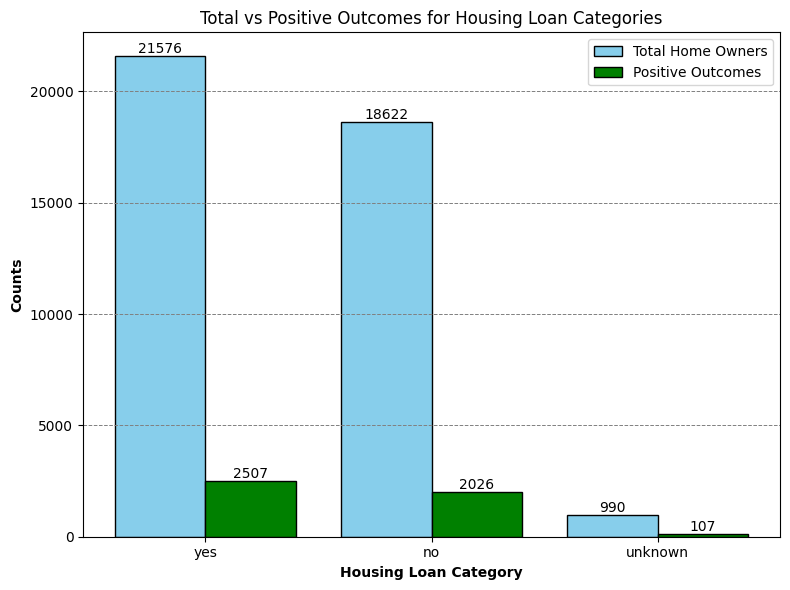

In [784]:
# ploting positive home owners categories against their totals

housing_loan_categories = ['yes', 'no', 'unknown']

total_counts = [21576, 18622, 990]
positive_counts = [2507, 2026, 107]

bar_width = 0.40

r1 = np.arange(len(housing_loan_categories))
r2 = [x + bar_width for x in r1]


plt.figure(figsize=(8, 6))
plt.grid(axis='y', color='grey', linestyle='--', linewidth=0.7)

bars1 = plt.bar(r1, total_counts, color='skyblue', width=bar_width,
                edgecolor='black', label='Total Home Owners')
bars2 = plt.bar(r2, positive_counts, color='green', width=bar_width,
                edgecolor='black', label='Positive Outcomes')

plt.xlabel('Housing Loan Category', fontweight='bold')
plt.ylabel('Counts', fontweight='bold')
plt.title('Total vs Positive Outcomes for Housing Loan Categories')
plt.xticks([r + bar_width/2 for r in range(len(housing_loan_categories))],
           housing_loan_categories, rotation=0)

plt.legend()

for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval,
             int(yval), ha='center', va='bottom')

for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval,
             int(yval), ha='center', va='bottom')

plt.tight_layout()
plt.show()

<em>--> Out of the 21576 home owners interviewed, only 2507 agreed to a term deposit, just 2026 out of the 18622 accepted to the bank's conditions and 107 out of 990 who didn't know if they were home owners or rented a house went for the bank's proposal.<em>

In [785]:
# calculating how many times some customers were contacted during the campaign

positive_campaign_count = positive_df['campaign_contacts'].value_counts()

print(f'Total of positive outcomes: {positive_target_count}\n')
print(positive_campaign_count)

Total of positive outcomes: 4640

campaign_contacts
1     2300
2     1211
3      574
4      249
5      120
6       75
7       38
8       17
9       17
10      12
11      12
17       4
13       4
12       3
15       2
23       1
14       1
Name: count, dtype: int64


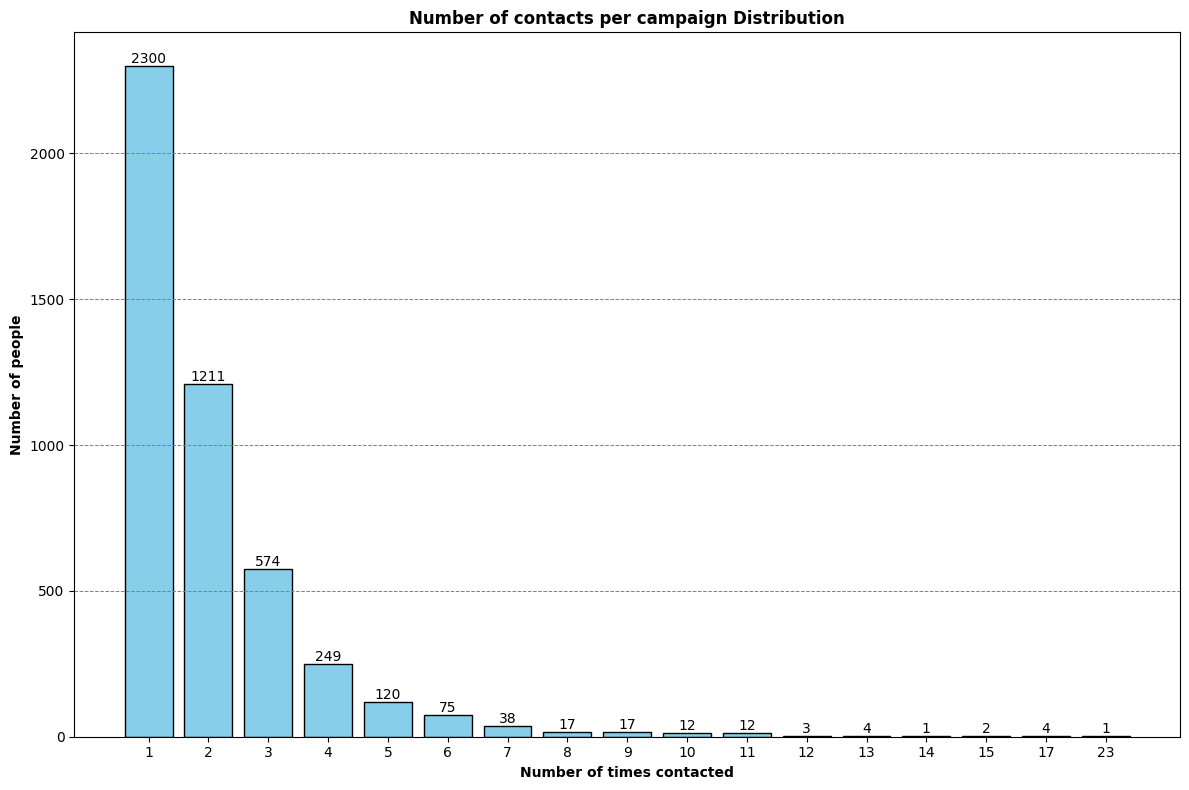

In [786]:
# ploting the above data in a bar chart

labels = ['1', '2', '3', '4', '5', '6', '7', '8', '9',
          '10', '11', '12', '13', '14', '15', '17', '23']
sizes = [2300, 1211, 574, 249, 120, 75, 38, 17, 17, 12, 12, 3, 4, 1, 2, 4, 1]

plt.figure(figsize=(12, 8))
plt.grid(axis='y', color='grey', linestyle='--', linewidth=0.7)
bars = plt.bar(labels, sizes, edgecolor='black', color='skyblue')

plt.xlabel('Number of times contacted', fontweight='bold')
plt.ylabel('Number of people', fontweight='bold')
plt.title('Number of contacts per campaign Distribution', fontweight='bold')
# plt.xticks(rotation=45)
plt.tight_layout()

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval,
             int(yval), va='bottom', ha='center')

plt.show()

<em>--> Out of the 4640 positive outcomes of the campaign, 2300 people, representing half of the group accepted to a term deposit on the first call! 1211 needed a follow-up call, with 1 person needing a total of 23 calls to make his mind!!<em>

In [787]:
# displaying the entry who needed 23 calls to agree to the bank's terms

filtered_rows = positive_df[positive_df['campaign_contacts'] == 23]

print(filtered_rows)

             job marital_status education credit_default housing_loan  \
age                                                                     
39   blue-collar        married  basic.9y             no           no   

    personal_loan contact_type contact_month contact_day_of_week  \
age                                                                
39             no    telephone           may                 thu   

     call_duration  campaign_contacts  days_since_last_contact  \
age                                                              
39             651                 23                      999   

     previous_contacts previous_outcome  employment_variation_rate  \
age                                                                  
39                   0      nonexistent                        1.1   

     consumer_price_index  consumer_confidence_index  euribor_3_months  \
age                                                                      
39               

<em>--> The person who needed 23 calls to finally agree to the bank's conditions is 39 years old, married, has a basic education level of basic 9y schooling, no housing nor personal loans and is a manual labour or skilled worker. The reason he took so much time to decide is probably the fact that the period in which he was contacted had a very low consumer confidence index of -36.4, meaning that consumers at that time were very pessimistic about the state of the economy. <em>

In [788]:
# calculating purchase history of customers

previous_outcome_count = df2['previous_outcome'].value_counts()
print(previous_outcome_count)

previous_outcome
nonexistent    35563
failure         4252
success         1373
Name: count, dtype: int64


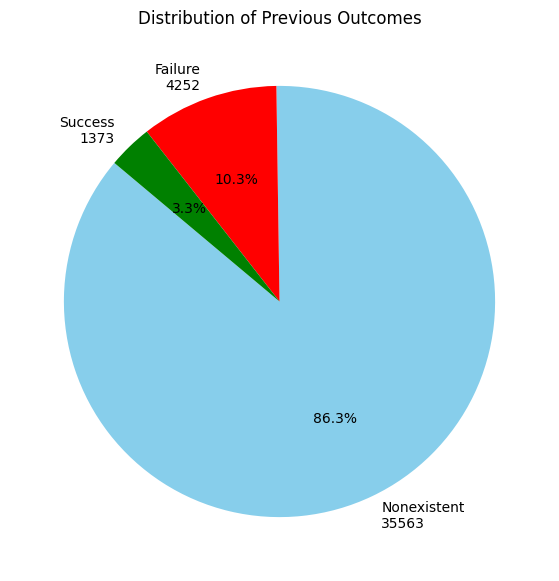

In [789]:
# ploting the above data in a pie chart

labels = ['Nonexistent', 'Failure', 'Success']
sizes = [35563, 4252, 1373]

custom_labels = [f'{label}\n{size}' for label, size in zip(labels, sizes)]

plt.figure(figsize=(8, 7))
plt.pie(sizes, labels=custom_labels, autopct='%1.1f%%',
        startangle=140, colors=['skyblue', 'red', 'green'])
plt.title('Distribution of Previous Outcomes')
plt.show()

<em>--> Out of the 41188 people contacted during this campaign, 5625 were contacted on a previous campaign, which resulted in 1373 positive outcomes and 4252 failures.<em>
<p style = "text-align: center ;">---------------------- || ----------------------</p>
<em><b>--> Now we move into identifying distinct customer segments, using demographic factors for age-based segments as yound adults, middle-aged adults, older adults and seniors, as well as  marital-based segments. We also use socioeconomic factors such as low-income, middle-income and high-income plus education-based segments such as basic education, high school and university degree and check their response to past marketing campaigns.<b><em>

In [790]:
# Aged-based segments

bins = [17, 25, 45, 60, 100]
labels = ['18-25', '26-45', '46-60', '60+']

positive_df = positive_df.reset_index()

# Cut the 'age' column into bins and assign the labels
positive_df['age_group'] = pd.cut(positive_df['age'], bins=bins, labels=labels, right=False)

# Group by 'age_group' and count the occurrences in each group
positive_age_group_counts = positive_df['age_group'].value_counts().sort_index()

print(positive_age_group_counts)

age_group
18-25     256
26-45    2834
46-60    1078
60+       472
Name: count, dtype: int64


<em>--> 4 distinct segmentation groups have been created, namely 18-25(young adults), 26-45(middle-aged adults), 46-60(older adults) and 60+(seniors). <em>

In [791]:
# displaying the previous outcome results for the above age-based segments

bins = [17, 25, 45, 60, 100]
labels = ['18-25', '26-45', '46-60', '60+']

# Create a new column for age group in positive_df
positive_df['age_group'] = pd.cut(positive_df['age'], bins=bins, labels=labels)

# Group by age group and count the previous outcomes
grouped = positive_df.groupby(
    'age_group')['previous_outcome'].value_counts().unstack().fillna(0)

print(grouped)

previous_outcome  failure  nonexistent  success
age_group                                      
18-25                  57          210       80
26-45                 337         2014      482
46-60                 131          714      199
60+                    79          203      132


/var/folders/b9/yq39ggkn7d742qp6sr3dt5s80000gn/T/ipykernel_2456/2871200823.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = positive_df.groupby(


<em>--> The above data is very interesting. It shows us 4 age groups, and their respective responses to present and past campaigns. The failure and success figures show us the response from previous campaigns, and the nonexistent figures mean that they have not been contacted in previous campaigns. But, since all these figures have been extracted from the positive_df dataframe which contains all positive outcomes, it means that the nonexistent figures have all been successfully converted during the actual campaign! <em>

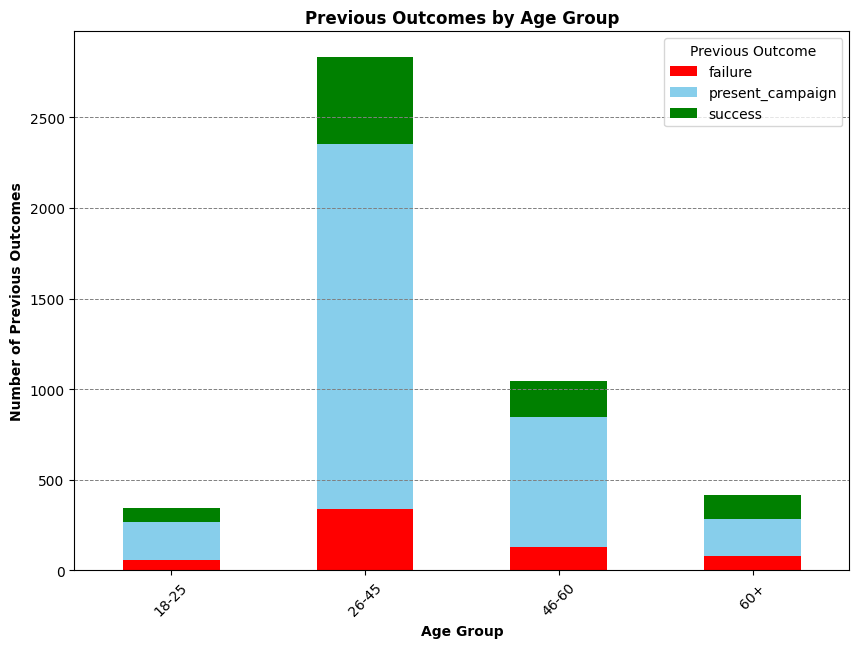

In [792]:
# ploting the above data in stacked bar chart

data = {
    'age_group': ['18-25', '26-45', '46-60', '60+'],
    'failure': [57, 337, 131, 79],
    'present_campaign': [210, 2014, 714, 203],
    'success': [80, 482, 199, 132]
}

df = pd.DataFrame(data)

# Set the age_group as the index
df.set_index('age_group', inplace=True)

df.plot(kind='bar', stacked=True, color=[
        'red', 'skyblue', 'green'], figsize=(10, 7))
plt.title('Previous Outcomes by Age Group', fontweight='bold')
plt.xlabel('Age Group', fontweight='bold')
plt.ylabel('Number of Previous Outcomes', fontweight='bold')
plt.legend(title='Previous Outcome')
plt.xticks(rotation=45)
plt.grid(axis='y', color='grey', linestyle='--', linewidth=0.7)

plt.show()

In [793]:
# marital-based segments

positive_marital_status_count = positive_df['marital_status'].value_counts()
print(f'Positive outcomes from the marital status groups: {
      positive_marital_status_count}')

Positive outcomes from the marital status groups: marital_status
married     2532
single      1620
divorced     476
unknown       12
Name: count, dtype: int64


In [794]:
grouped = positive_df.groupby(
    'marital_status')['previous_outcome'].value_counts().unstack().fillna(0)

print(grouped)

previous_outcome  failure  nonexistent  success
marital_status                                 
divorced               60          323       93
married               338         1725      469
single                206         1085      329
unknown                 1            8        3


<em>--> The above data portrays the different marital categories and their respective success and failure outcomes from the present and past campaigns. The trend is that married couples tend more to save than singles and divorced people.<em>
<p style = "text-align: center ;">---------------------- || ----------------------</p>
<em>--> We will now group job categories into 3 distinct segments, namely low-income, middle-income and high-income groups.<em>

In [795]:
# income-based segments

positive_job_count = positive_df['job'].value_counts()
print(positive_job_count)

job
admin.           1352
technician        730
blue-collar       638
retired           434
management        328
services          323
student           275
self-employed     149
unemployed        144
entrepreneur      124
housemaid         106
unknown            37
Name: count, dtype: int64


In [796]:
# grouping the above data into distinct customer segments

data = {
    'job': ['admin.', 'technician', 'blue-collar', 'retired', 'management', 'services', 'student', 'unemployed', 'entrepreneur', 'housemaid'],
    'count': [1352, 730, 638, 434, 328, 323, 275, 144, 124, 106]
}
df_income = pd.DataFrame(data)

def categorize_income(job_title):
    if job_title in ['blue-collar', 'services', 'housemaid', 'student', 'unemployed']:
        return 'Low-Income'
    elif job_title in ['admin.', 'technician', 'retired', 'entrepreneur']:
        return 'Middle-Income'
    elif job_title in ['management']:
        return 'High-Income'
    else:
        return 'Unclassified'

df_income['income_group'] = df_income['job'].apply(categorize_income)

result = df_income.groupby(df_income['income_group'])[
    'count'].sum().reset_index()

print(result)

    income_group  count
0    High-Income    328
1     Low-Income   1486
2  Middle-Income   2640


In [797]:
# comparing the above distinct customer job segment to actual and past campaingns

def categorize_income(job_title):
    if job_title in ['blue-collar', 'services', 'housemaid', 'student', 'unemployed']:
        return 'Low-Income'
    elif job_title in ['admin.', 'technician', 'retired', 'entrepreneur']:
        return 'Middle-Income'
    elif job_title in ['management']:
        return 'High-Income'
    else:
        return 'Unclassified'

positive_df['income_group'] = positive_df['job'].apply(categorize_income)

result = positive_df.groupby(positive_df['income_group'])[
    'previous_outcome'].value_counts().unstack().fillna(0)

print(result)

previous_outcome  failure  nonexistent  success
income_group                                   
High-Income            43          219       66
Low-Income            186         1047      253
Middle-Income         349         1738      553
Unclassified           27          137       22


<em>--> Whether it is from this current campaign or the past ones, we can clearly see that middle-income groups tend to favor more the term deposit proposal, followed by the low-income group. We can also note that the success rate of previous campaigns are higher than failure rates in all income categories, except for the unclassified group.<em>

In [798]:
positive_education_count = positive_df['education'].value_counts()
print(positive_education_count)

education
university.degree      1670
high.school            1031
professional.course     595
basic.9y                473
basic.4y                428
unknown                 251
basic.6y                188
illiterate                4
Name: count, dtype: int64


In [799]:
# grouping the above data into distinct group segments

education_data = {
    'education': ['university.degree', 'high.school', 'professional.course', 'basic.9y', 'basic.4y', 'unknown', 'basic.6y'],
    'count': [1670, 1031, 595, 473, 428, 251, 188]
}
df_education = pd.DataFrame(education_data)

def categorize_education(level):
    if level in ['university.degree', 'professional.course']:
        return 'Higher Education'
    elif level == 'high.school':
        return 'Secondary Education'
    elif level in ['basic.9y', 'basic.4y', 'basic.6y']:
        return 'Basic Education'
    elif level == 'unknown':
        return 'Unknown'
    else:
        return 'Unclassified'

df_education['broader_category'] = df_education['education'].apply(
    categorize_education)

result = df_education.groupby('broader_category')['count'].sum().reset_index()

print(result)

      broader_category  count
0      Basic Education   1089
1     Higher Education   2265
2  Secondary Education   1031
3              Unknown    251


In [800]:
# comparing present and past campaign results for the distinct education segments

def categorize_education(level):
    if level in ['university.degree', 'professional.course']:
        return 'Higher Education'
    elif level == 'high.school':
        return 'Secondary Education'
    elif level in ['basic.9y', 'basic.4y', 'basic.6y']:
        return 'Basic Education'
    elif level == 'unknown':
        return 'Unknown'
  
positive_df['broader_category'] = positive_df['education'].apply(categorize_education)

result = positive_df.groupby(positive_df['broader_category'])[
    'previous_outcome'].value_counts().unstack().fillna(0)

print(result)

previous_outcome     failure  nonexistent  success
broader_category                                  
Basic Education          129          794      166
Higher Education         291         1496      478
Secondary Education      138          709      184
Unknown                   47          139       65


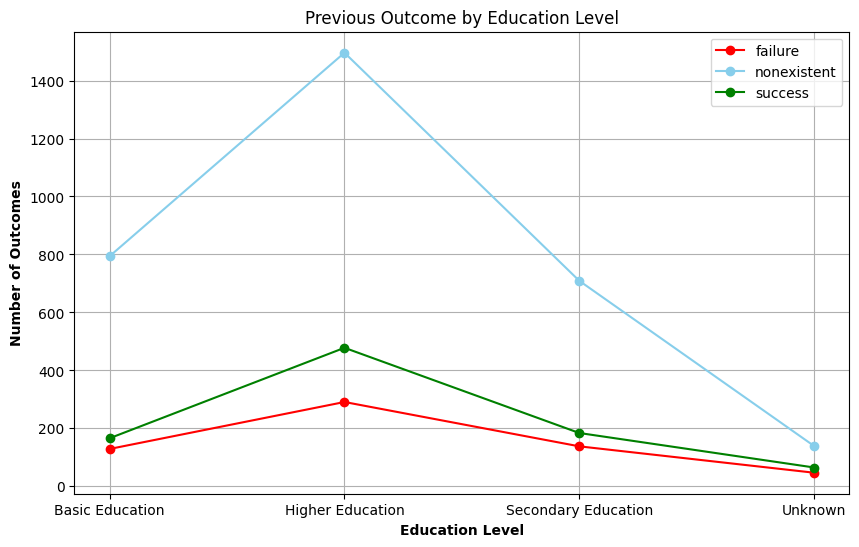

In [801]:

data = {
    'broader_category': ['Basic Education', 'Higher Education', 'Secondary Education', 'Unknown'],
    'failure': [129, 291, 138, 47],
    'nonexistent': [794, 1496, 709, 139],
    'success': [166, 478, 184, 65]
}

df = pd.DataFrame(data)
df.set_index('broader_category', inplace=True)

plt.figure(figsize=(10, 6))
plt.plot(df.index, df['failure'], marker='o', color='red', label='failure')
plt.plot(df.index, df['nonexistent'], marker='o',
         color='skyblue', label='nonexistent')
plt.plot(df.index, df['success'], marker='o', color='green', label='success')

plt.title('Previous Outcome by Education Level')
plt.xlabel('Education Level', fontweight='bold')
plt.ylabel('Number of Outcomes', fontweight='bold')
plt.legend()
plt.grid(True)
plt.show()

<em>--> The above line chart clearly shows that people with university degrees tend more to lean towards term deposits for investments. Maybe their university degrees, which helps them earn more money permit them to save enough to be able to subscribe to a term deposit. The other obvious observation also is that much more people have successfully been converted by the present campaign, represented by the skyblue line.<em>
<p style = "text-align: center ;">---------------------- || ----------------------</p>

<em><b>--> We now move into Campaign Effectiveness Analysis.</b><em>

In [802]:
# calculating if any of the negative outcomes from this current campaign has been successfully converted in the past  

negative_df = df2[df2['target'] == 'no']

result = negative_df.groupby('target')['previous_outcome'].value_counts().unstack().fillna(0)
print(result)

previous_outcome  failure  nonexistent  success
target                                         
no                   3647        32422      479


<em>--> Yes! It seems that 479 people had a positive outcome from previous campaigns, but refused to subscribe this time. If we go further into the analysis of the data, we see that 32422 people were never contacted before, and 3647 were unsuccessfully converted, in the past and present campaigns! <em>

In [803]:
#  calculating if the positive outcomes from this campaign had successfully subscribed to the bank's services in the past

result = positive_df.groupby(
    'target')['previous_outcome'].value_counts().unstack().fillna(0)
print(result)

previous_outcome  failure  nonexistent  success
target                                         
yes                   605         3141      894


<em>--> Yes! 894 people are returning customers! 605 did not convert in the past but agreed to a term deposit in this campaign. And 3141 were never contacted before.<em>

In [804]:
# calculating the number of times the positive outcomes from the present campaign had been contacted before

result = positive_df.groupby('previous_contacts')[
    'previous_outcome'].value_counts().unstack().fillna(0)
print(result)

previous_outcome   failure  nonexistent  success
previous_contacts                               
0                      0.0       3141.0      0.0
1                    451.0          0.0    516.0
2                    112.0          0.0    238.0
3                     32.0          0.0     96.0
4                      9.0          0.0     29.0
5                      1.0          0.0     12.0
6                      0.0          0.0      3.0


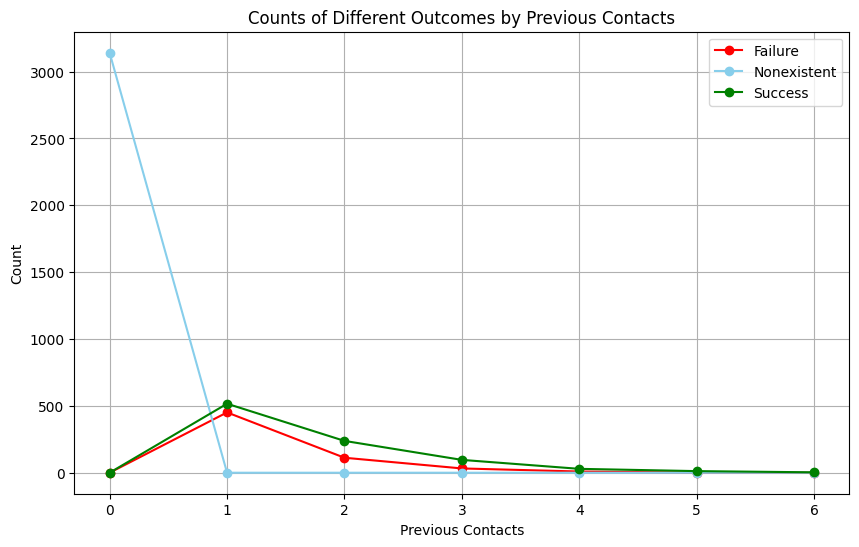

previous_outcome   failure  nonexistent  success
previous_contacts                               
0                      0.0       3141.0      0.0
1                    451.0          0.0    516.0
2                    112.0          0.0    238.0
3                     32.0          0.0     96.0
4                      9.0          0.0     29.0
5                      1.0          0.0     12.0
6                      0.0          0.0      3.0


In [805]:
# ploting the above data in a line chart

previous_contacts = [0, 1, 2, 3, 4, 5, 6]
failure = [0.0, 451.0, 112.0, 32.0, 9.0, 1.0, 0.0]
nonexistent = [3141.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
success = [0.0, 516.0, 238.0, 96.0, 29.0, 12.0, 3.0]

plt.figure(figsize=(10, 6))
plt.plot(previous_contacts, failure, color='red', marker='o', label='Failure')
plt.plot(previous_contacts, nonexistent, color='skyblue', marker='o', label='Nonexistent')
plt.plot(previous_contacts, success, color = 'green', marker='o', label='Success')

plt.xlabel('Previous Contacts')
plt.ylabel('Count')
plt.title('Counts of Different Outcomes by Previous Contacts')
plt.legend()

# Show plot
plt.grid(True)
plt.show()

result = positive_df.groupby('previous_contacts')[
    'previous_outcome'].value_counts().unstack().fillna(0)
print(result)

<em>--> Most of them were successfully converted during the actual campaign, while 238 needed a follow-up call. The most contacts needed was 6 for 3 people.<em>

In [806]:
#  IDENTIFYING THE MOST SUCCESSFUL CAMPAIGN:

# calculating success rate of previous campaigns
previous_outcome_count = df2['previous_outcome'].value_counts()
print(previous_outcome_count,'\n')


previous_outcome
nonexistent    35563
failure         4252
success         1373
Name: count, dtype: int64 



<em>--> The 'nonexistent' figure represents the number of people contacted during the present campaign only, since they were nonexistent in the last campaigns.<br><br>4252 people contacted during the previous campaigns negatively responded to the bank's marketing, while 1373 people were successfully converted.<em>

In [807]:
# calculating the number of times the people from the above data were contacted

grouped_df = df2.groupby('previous_outcome')[
    'previous_contacts'].value_counts().unstack().fillna(0)

print(grouped_df)

previous_contacts        0       1      2      3     4     5    6    7
previous_outcome                                                      
failure                0.0  3696.0  434.0   88.0  30.0   3.0  1.0  0.0
nonexistent        35563.0     0.0    0.0    0.0   0.0   0.0  0.0  0.0
success                0.0   865.0  320.0  128.0  40.0  15.0  4.0  1.0


In [808]:
# identifying the unique selling point of the most successful campaign: data taken from the dataframe containing only positive targets

print('---------------------------------------------------------------')
print('Part 1:')
success_rate = positive_df.groupby(
    'target')['previous_outcome'].value_counts().unstack().fillna(0)
print(success_rate,'\n')
print('---------------------------------------------------------------')
# Group by 'previous_outcome' and 'previous_contacts', and calculate mean of 'euribor3m'
print('Part 2:')
grouped_euribor_df = positive_df.groupby(['previous_outcome', 'previous_contacts'])[
    'euribor_3_months'].mean().unstack().fillna(0)

print(grouped_euribor_df)

---------------------------------------------------------------
Part 1:
previous_outcome  failure  nonexistent  success
target                                         
yes                   605         3141      894 

---------------------------------------------------------------
Part 2:
previous_contacts         0         1         2         3         4         5  \
previous_outcome                                                                
failure            0.000000  1.193486  0.898616  0.788062  0.889667  1.044000   
nonexistent        2.669357  0.000000  0.000000  0.000000  0.000000  0.000000   
success            0.000000  0.931667  0.824450  0.844500  0.791000  0.825917   

previous_contacts         6  
previous_outcome             
failure            0.000000  
nonexistent        0.000000  
success            0.946667  


<em>--> Part 1 represents ALL the positive_outcomes of all the campaigns, past and present.The nonexistent figure shows that out of the total of 4640 positive outcomes, 3141 are nonexistent in the previous outcome, meaning they come from the actual campaign. So the actual campaign has 3141 successful converts compared to 894 from past campaigns, making the actual campaign the most successful one!<br><br>Part 2:<br><br>The Euribor3m(Euro Interbank Offered Rate 3-months) is a benchmark interest rate that reflects the average interest rate at which a selection of European banks are willing to lend to one another for a period of 3 months.<br><br> The above data shows at what mean rate the Euribor3m was for each previous outcome groups at their respective contact dates.<br><br>We also note that the 'nonexistent' group comes from the actual campaign, since the above data comes from the 'previous_outcome' column.<br><br>This means that the Euribor3m was at its highest during the actual campaign, with a mean of 2.66.<br><br><b> We can thus deduct that the deciding factor which has convinced people to subscribe to the bank's services is the high Euribor3m, which directly translates to higher interest rates on term deposits!!</b><br><br>We can also understand why the Euribor3m was at its highest at that time, because in order for banks to attract new customers for liquidity, since we are in a recession(campaigns done from may 2008 to nov 2010), they increase interest rates on term deposits, thus the high Euribor3m rate.   <em>

In [809]:
# understanding the characteristics of customers who responded positively

# ----------------------------------------------------------------------
print('Part 1: Age Groups','\n')
bins = [17, 25, 45, 60, 100]
labels = ['18-25', '26-45', '46-60', '60+']

# Create a new column for age group in positive_df
positive_df['age_group'] = pd.cut(positive_df['age'], bins=bins, labels=labels)

# Group by age group and count the previous outcomes
grouped2 = positive_df.groupby(
    'age_group')['previous_outcome'].value_counts().unstack().fillna(0)

print(grouped2, '\n')

# ----------------------------------------------------------------------
print('Part 2: Marital Status','\n')

grouped = positive_df.groupby(
    'marital_status')['previous_outcome'].value_counts().unstack().fillna(0)

print(grouped,'\n')

# ----------------------------------------------------------------------
print('Part 3: Education','\n')

def categorize_education(level):
    if level in ['university.degree', 'professional.course']:
        return 'Higher Education'
    elif level == 'high.school':
        return 'Secondary Education'
    elif level in ['basic.9y', 'basic.4y', 'basic.6y']:
        return 'Basic Education'
    elif level == 'unknown':
        return 'Unknown'

positive_df['broader_category'] = positive_df['education'].apply(
    categorize_education)

result = positive_df.groupby(positive_df['broader_category'])[
    'previous_outcome'].value_counts().unstack().fillna(0)

print(result,'\n')

# ----------------------------------------------------------------------
print('Part 4: Income Groups','\n')

def categorize_income(job_title):
    if job_title in ['blue-collar', 'services', 'housemaid', 'student', 'unemployed']:
        return 'Low-Income'
    elif job_title in ['admin.', 'technician', 'retired', 'entrepreneur']:
        return 'Middle-Income'
    elif job_title in ['management']:
        return 'High-Income'
    else:
        return 'Unclassified'


positive_df['income_group'] = positive_df['job'].apply(categorize_income)

result_2 = positive_df.groupby(positive_df['income_group'])[
    'previous_outcome'].value_counts().unstack().fillna(0)

print(result_2)

Part 1: Age Groups 

previous_outcome  failure  nonexistent  success
age_group                                      
18-25                  57          210       80
26-45                 337         2014      482
46-60                 131          714      199
60+                    79          203      132 

Part 2: Marital Status 

previous_outcome  failure  nonexistent  success
marital_status                                 
divorced               60          323       93
married               338         1725      469
single                206         1085      329
unknown                 1            8        3 

Part 3: Education 

previous_outcome     failure  nonexistent  success
broader_category                                  
Basic Education          129          794      166
Higher Education         291         1496      478
Secondary Education      138          709      184
Unknown                   47          139       65 

Part 4: Income Groups 

previous_outcome  fail

/var/folders/b9/yq39ggkn7d742qp6sr3dt5s80000gn/T/ipykernel_2456/1835828167.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped2 = positive_df.groupby(


<em>--> The characteristics of customers who responded positively are young adults from the 26-45 age group, married, having university degrees and with middle-income wages.
<p style = "text-align: center ;">---------------------- || ----------------------</p>
<b>--> Now we move into Predictive Modeling</b>
<em>

In [810]:
# displaying the first 5 entries to determine which columns to encode

df2.head()

,job,marital_status,education,credit_default,housing_loan,personal_loan,contact_type,contact_month,contact_day_of_week,call_duration,campaign_contacts,days_since_last_contact,previous_contacts,previous_outcome,employment_variation_rate,consumer_price_index,consumer_confidence_index,euribor_3_months,number_employed,target
age,,,,,,,,,,,,,,,,,,,,
56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [811]:
# encoding 'job', 'marital_status', 'education', 'credit_default', 'housing_loan', 'personal_loan', 'previous_outcome', 'target'

from sklearn.preprocessing import LabelEncoder

columns_to_encode = ['job', 'marital_status',
                     'education', 'credit_default', 'housing_loan', 'personal_loan', 'contact_month', 'contact_day_of_week', 'previous_outcome','target'] 

# Initialize a LabelEncoder object
label_encoder = LabelEncoder()

# Loop through each column and apply the LabelEncoder
for column in columns_to_encode:
    df2[column] = label_encoder.fit_transform(df2[column])
    
predictive_df=df2
predictive_df.head()

,job,marital_status,education,credit_default,housing_loan,personal_loan,contact_type,contact_month,contact_day_of_week,call_duration,campaign_contacts,days_since_last_contact,previous_contacts,previous_outcome,employment_variation_rate,consumer_price_index,consumer_confidence_index,euribor_3_months,number_employed,target
age,,,,,,,,,,,,,,,,,,,,
56,3,1,0,0,0,0,telephone,6,1,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
57,7,1,3,1,0,0,telephone,6,1,149,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
37,7,1,3,0,2,0,telephone,6,1,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
40,0,1,1,0,0,0,telephone,6,1,151,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
56,7,1,3,0,0,2,telephone,6,1,307,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


<em>--> Displaying categorical variables and their respective encoded values.<em>

In [812]:
# le = LabelEncoder()
# df2['job'] = le.fit_transform(df2['job'])

# label_mapping_df = pd.DataFrame(
#     {'Job': le.classes_, 'Encoded Value': range(len(le.classes_))})

# print(label_mapping_df)

In [813]:
# df2['marital_status'] = le.fit_transform(df2['marital_status'])

# label_mapping_df = pd.DataFrame(
#     {'marital_status': le.classes_, 'Encoded Value': range(len(le.classes_))})

# print(label_mapping_df)

In [814]:
# df2['education'] = le.fit_transform(df2['education'])

# label_mapping_df = pd.DataFrame(
#     {'education': le.classes_, 'Encoded Value': range(len(le.classes_))})

# print(label_mapping_df)

In [815]:
# df2['credit_default'] = le.fit_transform(df2['credit_default'])

# label_mapping_df = pd.DataFrame(
#     {'credit_default': le.classes_, 'Encoded Value': range(len(le.classes_))})

# print(label_mapping_df)

In [816]:
# df2['housing_loan'] = le.fit_transform(df2['housing_loan'])

# label_mapping_df = pd.DataFrame(
#     {'housing_loan': le.classes_, 'Encoded Value': range(len(le.classes_))})

# print(label_mapping_df)

In [817]:
# df2['personal_loan'] = le.fit_transform(df2['personal_loan'])

# label_mapping_df = pd.DataFrame(
#     {'personal_loan': le.classes_, 'Encoded Value': range(len(le.classes_))})

# print(label_mapping_df)

In [818]:
# df2['contact_month'] = le.fit_transform(df2['contact_month'])

# label_mapping_df = pd.DataFrame(
#     {'contact_month': le.classes_, 'Encoded Value': range(len(le.classes_))})

# print(label_mapping_df)

In [819]:
# df2['contact_day_of_week'] = le.fit_transform(
#     df2['contact_day_of_week'])

# label_mapping_df = pd.DataFrame(
#     {'contact_day_of_week': le.classes_, 'Encoded Value': range(len(le.classes_))})

# print(label_mapping_df)

In [820]:
# df2['previous_outcome'] = le.fit_transform(
#     df2['previous_outcome'])

# label_mapping_df = pd.DataFrame(
#     {'previous_outcome': le.classes_, 'Encoded Value': range(len(le.classes_))})

# print(label_mapping_df)

In [821]:
# df2['target'] = le.fit_transform(
#     df2['target'])

# label_mapping_df = pd.DataFrame(
#     {'target': le.classes_, 'Encoded Value': range(len(le.classes_))})

# print(label_mapping_df)

In [822]:
predictive_df = predictive_df.reset_index()
predictive_df.head()

,age,job,marital_status,education,credit_default,housing_loan,personal_loan,contact_type,contact_month,contact_day_of_week,...,campaign_contacts,days_since_last_contact,previous_contacts,previous_outcome,employment_variation_rate,consumer_price_index,consumer_confidence_index,euribor_3_months,number_employed,target
0,56,3,1,0,0,0,0,telephone,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,telephone,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,telephone,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,telephone,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,telephone,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [823]:
# assigning train / test variables

from sklearn.linear_model import LinearRegression

train = predictive_df.drop(['contact_type','contact_month', 'contact_day_of_week', 'number_employed', 'target', 'contact_type', 'call_duration', 'employment_variation_rate', 'consumer_price_index', 'days_since_last_contact'], axis=1)
test = predictive_df['target']


In [824]:
train.head()

,age,job,marital_status,education,credit_default,housing_loan,personal_loan,campaign_contacts,previous_contacts,previous_outcome,consumer_confidence_index,euribor_3_months
0,56,3,1,0,0,0,0,1,0,1,-36.4,4.857
1,57,7,1,3,1,0,0,1,0,1,-36.4,4.857
2,37,7,1,3,0,2,0,1,0,1,-36.4,4.857
3,40,0,1,1,0,0,0,1,0,1,-36.4,4.857
4,56,7,1,3,0,0,2,1,0,1,-36.4,4.857


In [825]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(train, test, test_size=0.25, random_state=12)

In [826]:
X_train

,age,job,marital_status,education,credit_default,housing_loan,personal_loan,campaign_contacts,previous_contacts,previous_outcome,consumer_confidence_index,euribor_3_months
10521,53,0,1,2,0,0,0,1,0,1,-41.8,4.961
33022,47,1,1,0,1,0,0,4,0,1,-46.2,1.299
959,44,1,1,0,0,2,0,2,0,1,-36.4,4.856
24921,36,1,1,2,0,2,0,1,1,0,-42.0,4.153
9199,42,1,1,0,1,0,0,1,0,1,-41.8,4.967
...,...,...,...,...,...,...,...,...,...,...,...,...
36482,26,8,2,5,0,2,0,1,1,0,-40.8,1.260
40177,60,0,1,6,0,0,0,1,2,2,-40.3,0.861
19709,50,2,1,5,1,2,0,4,0,1,-36.1,4.968
38555,28,0,2,6,0,0,0,2,0,1,-26.9,0.722


In [827]:
from sklearn.linear_model import LinearRegression
lr_model=LinearRegression()

In [828]:
lr_model.fit(X_train, Y_train)

LinearRegression()

In [829]:
y_pred = lr_model.predict(X_test)

In [830]:
y_pred

array([0.19038515, 0.10099881, 0.07783534, ..., 0.06917945, 0.07569318,
       0.19323319])

In [831]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(Y_test, y_pred)
mse

0.08517544910375621

In [832]:
score = lr_model.score(X_test, Y_test)
print(f'Linear Regression Score: {score*100:.2f} %')

Linear Regression Score: 16.12 %


<em>--> The mean square error is 0.08 which actually means it is less prone to errors, but the linear regression model scores only 16%, which shows that the variables used are not really linear connected.<br><br>We will try other models.<em>

In [833]:
# support vector regression

from sklearn.svm import SVR

svr_model=SVR()
svr_model.fit(X_train,Y_train)

y_pred_svr=svr_model.predict(X_test)

mse_svr=mean_squared_error(Y_test, y_pred_svr)
print(mse_svr)

svr_score=svr_model.score(X_test, Y_test)
print(f'Support Vector Regression score: {svr_score*100:.2f} %')


0.09268100710292103
Support Vector Regression score: 8.72 %


<em>--> The support vector regression model is even less accurate than the linear regression model.<em>

In [840]:
# identifying the most influential features affecting customer decisions 

def categorize_education(level):
    if level in ['university.degree', 'professional.course']:
        return 'Higher Education'
    elif level == 'high.school':
        return 'Secondary Education'
    elif level in ['basic.9y', 'basic.4y', 'basic.6y']:
        return 'Basic Education'
    elif level == 'unknown':
        return 'Unknown'


positive_df['broader_category'] = positive_df['education'].apply(
    categorize_education)

result = positive_df.groupby(positive_df['broader_category'])[
    'previous_outcome'].value_counts().unstack().fillna(0)

print(result, '\n')

# ----------------------------------------------------------------------

def categorize_income(job_title):
    if job_title in ['blue-collar', 'services', 'housemaid', 'student', 'unemployed']:
        return 'Low-Income'
    elif job_title in ['admin.', 'technician', 'retired', 'entrepreneur']:
        return 'Middle-Income'
    elif job_title in ['management']:
        return 'High-Income'
    else:
        return 'Unclassified'


positive_df['income_group'] = positive_df['job'].apply(categorize_income)

result_2 = positive_df.groupby(positive_df['income_group'])[
    'previous_outcome'].value_counts().unstack().fillna(0)

print(result_2)


previous_outcome     failure  nonexistent  success
broader_category                                  
Basic Education          129          794      166
Higher Education         291         1496      478
Secondary Education      138          709      184
Unknown                   47          139       65 

previous_outcome  failure  nonexistent  success
income_group                                   
High-Income            43          219       66
Low-Income            186         1047      253
Middle-Income         349         1738      553
Unclassified           27          137       22


<em>--> Features like higher education, middle-income, euribor3m and number of contacts affect customer decisions.<em>